In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
student_data = pd.read_csv("/content/1a_linear_regression_dirty - 1a_linear_regression_dirty.csv")

In [3]:
student_data

,House_Size,Bedrooms,Age,Price
0,1649.0,1,22.0,245256
1,1458.0,5,3.0,169804
2,1694.0,1,16.0,215222
3,1956.0,3,29.0,212860
4,1429.0,2,9.0,201196
...,...,...,...,...
95,1060.0,1,9.0,138971
96,1588.0,5,11.0,166539
97,1578.0,2,22.0,258096
98,1501.0,2,16.0,277642


In [4]:
student_data.head()

,House_Size,Bedrooms,Age,Price
0,1649.0,1,22.0,245256
1,1458.0,5,3.0,169804
2,1694.0,1,16.0,215222
3,1956.0,3,29.0,212860
4,1429.0,2,9.0,201196


### Mean , Median , Mode

In [5]:
std_house_size_mean = student_data['House_Size'].mean()
print("student house size mean :",std_house_size_mean)

student house size mean : 1468.7878787878788


In [6]:
std_house_size_median = student_data['House_Size'].median()
print("student house size median :",std_house_size_median)

student house size median : 1465.0


In [7]:
std_house_size_mode = student_data['House_Size'].mode()
print("student house size mode :",std_house_size_mode)

student house size mode : 0    1319.0
1    1360.0
2    1429.0
3    1608.0
4    1746.0
Name: House_Size, dtype: float64


In [8]:
std_age_mean = student_data['Age'].mean()
print("student age mean :",std_age_mean)
std_age_median = student_data['Age'].median()
print("student age median :",std_age_median)
std_age_mode = student_data['Age'].mode()
print("student age mode :",std_age_mode[0])

student age mean : 14.797979797979798
student age median : 16.0
student age mode : 1.0


In [23]:
# student_data['Bedrooms'] = student_data['Bedrooms'].replace('three',3)

In [24]:
# Method 2
words_to_numbers = {'zero': 0, 'one': 1, 'two': 2, 'three': 3,
                    'four': 4, 'five': 5}
def bedroom_to_numeric(val):
    if isinstance(val, str) and val.lower() in words_to_numbers:
        return words_to_numbers[val.lower()]
    try:
        return int(val)
    except:
        return np.nan  # Missing or invalid value as NaN

student_data['Bedrooms'] = student_data['Bedrooms'].apply(bedroom_to_numeric)



### Fillna --> Filling Missing Values

In [25]:
student_data.House_Size = student_data.House_Size.fillna(std_house_size_mean) #filling Missing value as mean
student_data.Age = student_data.Age.fillna(std_age_median)                    #filling Missing value as median
student_data.Bedrooms = student_data.Bedrooms.fillna(std_age_mode[0])        #filling Missing value as mode

In [12]:
print(student_data.isnull())  # check is there any Null value is available

    House_Size  Bedrooms    Age  Price
0        False     False  False  False
1        False     False  False  False
2        False     False  False  False
3        False     False  False  False
4        False     False  False  False
..         ...       ...    ...    ...
95       False     False  False  False
96       False     False  False  False
97       False     False  False  False
98       False     False  False  False
99       False     False  False  False

[100 rows x 4 columns]


In [13]:
print(student_data.iloc[10])  # pandas index from zero and without heading , it will become row no 10

House_Size      1360.0
Bedrooms           3.0
Age               21.0
Price         211614.0
Name: 10, dtype: float64


### Split the Dataset

In [14]:
# split the dataset
from sklearn.model_selection import train_test_split

x = student_data[['Age','Bedrooms','House_Size']]
y = student_data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train

,Age,Bedrooms,House_Size
55,6.0,4,1779.0
88,27.0,3,1341.0
26,14.0,1,1154.0
42,28.0,1,1465.0
69,29.0,2,1306.0
...,...,...,...
60,24.0,1,1356.0
71,23.0,4,1961.0
14,8.0,2,982.0
92,17.0,3,1289.0


In [16]:
x_test

,Age,Bedrooms,House_Size
83,18.0,3,1344.0
53,14.0,3,1683.0
70,21.0,1,1608.0
45,19.0,5,1284.0
44,16.0,3,1056.0
39,15.0,2,1559.0
22,19.0,2,1520.0
80,8.0,1,1434.0
10,21.0,3,1360.0
0,22.0,1,1649.0


In [17]:
y_train

,Price
55,153370
88,218100
26,227478
42,215888
69,203044
...,...
60,277153
71,206304
14,208251
92,227586


In [18]:
y_test

,Price
83,176773
53,293600
70,232358
45,263320
44,247269
39,283065
22,155343
80,175678
10,211614
0,245256


In [19]:
from sklearn.linear_model import LinearRegression


In [20]:
regressor = LinearRegression()

In [21]:
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
y_train_prediction = regressor.predict(x_train)
y_train_prediction

array([283725.59119932, 202103.97333686, 171012.2079902 , 226967.51345084,
       196525.1230752 , 202165.33226358, 274576.22312178, 247007.96611689,
       264588.24222819, 230782.05328647, 207709.3962819 , 291010.88431471,
       202994.80524644, 200050.04510414, 217081.81361999, 226773.37267989,
       228303.51760826, 309522.42705768, 166168.63519698, 179795.68301074,
       134899.90379064, 276706.91401872, 278065.87149347, 154172.80927153,
       256139.36537576, 156453.89354477, 254456.9786788 , 235829.82880287,
       170129.58964056, 124885.83762757, 200504.97261071, 315199.57961373,
       247542.1728143 , 156740.99482485, 206835.43035155, 234343.91868306,
       320995.83065716, 278842.63796889, 245501.57065181, 263311.08047089,
       186198.35777648, 221276.05999675, 288882.83795601, 213380.90035918,
       249629.29703699, 289312.60646635, 207976.98704452, 250894.18700895,
       220886.7262085 , 247295.01884241, 123706.36273912, 244998.04341777,
       253459.19205555, 2

In [30]:
prediction_y_test = regressor.predict(x_test)
prediction_y_test

array([203513.12079244, 266339.22658399, 253974.99107493, 190248.34666962,
       150652.48143648, 244461.32019375, 236896.65194432, 223160.57174962,
       206174.88643463, 261432.21719678, 185696.37224123, 196981.02540959,
       322185.9870776 , 171756.75330346, 238055.07461651, 221085.71931227,
       236741.09750317, 213172.6394106 , 244262.8145039 , 333043.38826223])

In [31]:
y_test

,Price
83,176773
53,293600
70,232358
45,263320
44,247269
39,283065
22,155343
80,175678
10,211614
0,245256


In [32]:
print(regressor.coef_)
print(regressor.intercept_)

[  -95.17034224 -1058.65813607   184.20479181]
-39169.078827729274


In [34]:
regressor.predict([[1500,3,20]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-181416.47075963])

In [41]:
 -95.17034224 * 1500 -1058.65813607*3 +  184.20479181 *20


-142247.39193200998

In [43]:
yy = regressor.intercept_ + x @ regressor.coef_.T   # here we taking Transpose of matrix

round(yy,2)

,0
0,261432.22
1,223822.71
2,270292.45
3,315199.58
4,221085.72
...,...
95,154172.81
96,247007.97
97,247295.02
98,233682.27


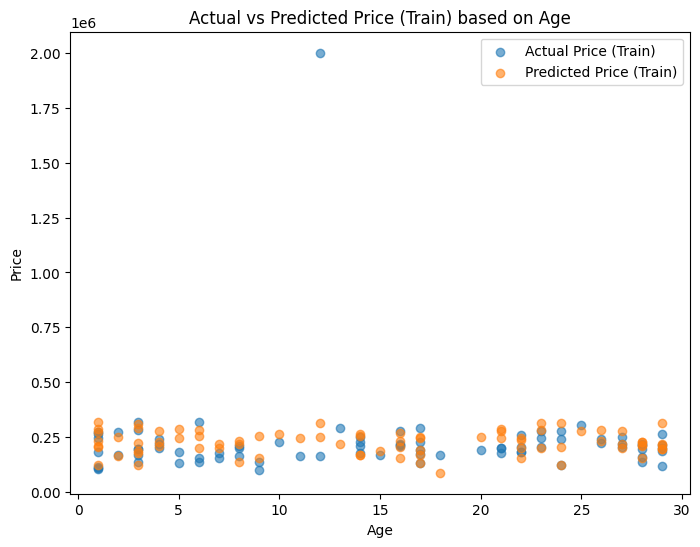

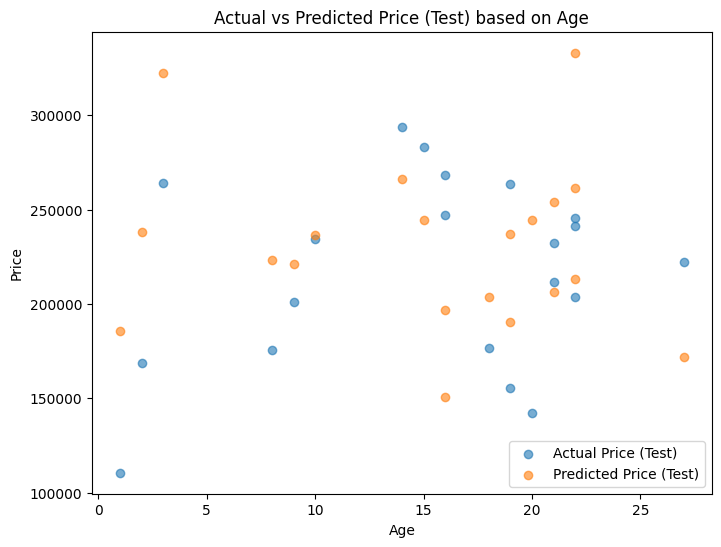

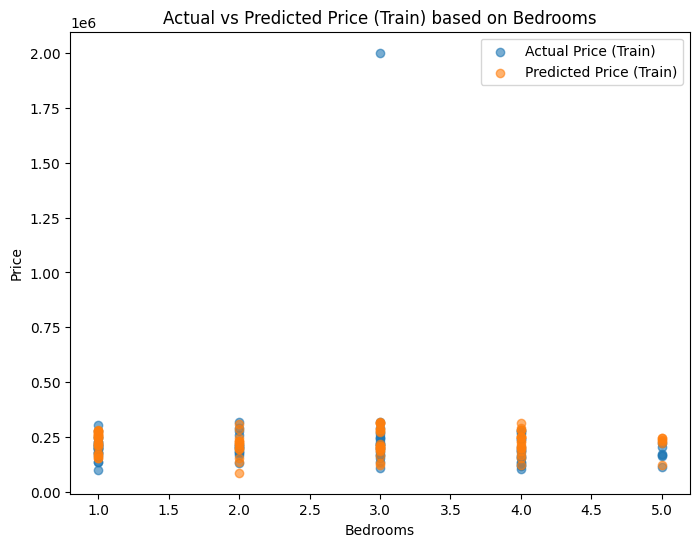

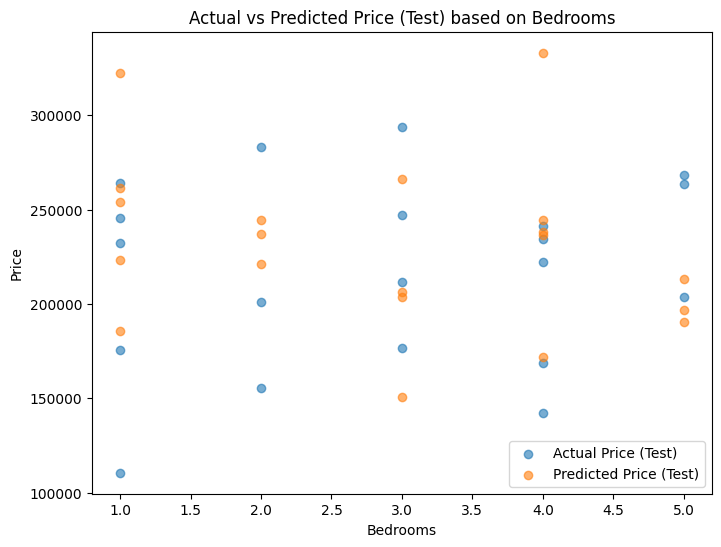

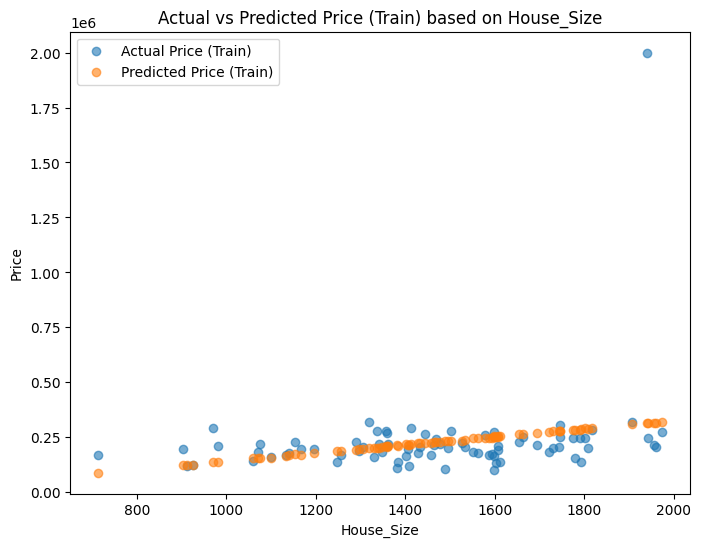

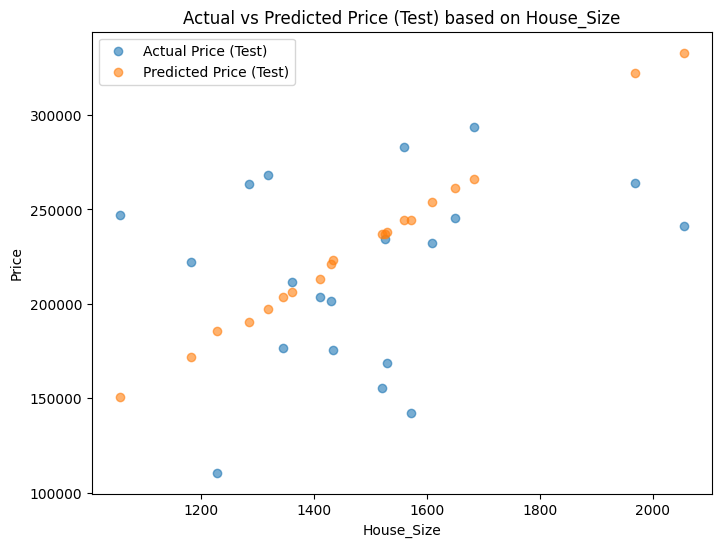

In [50]:

# Get independent variables
indep_variables = x.columns

# Plot training and testing data on different graphs
for col in indep_variables:
    plt.figure(figsize=(8, 6))
    # Plot actual vs predicted for training set
    plt.scatter(x_train[col], y_train, label='Actual Price (Train)', alpha=0.6)
    plt.scatter(x_train[col], regressor.predict(x_train), label='Predicted Price (Train)', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Price (Train) based on {col}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    # Plot actual vs predicted for testing set
    plt.scatter(x_test[col], y_test, label='Actual Price (Test)', alpha=0.6)
    plt.scatter(x_test[col], regressor.predict(x_test), label='Predicted Price (Test)', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Price (Test) based on {col}')
    plt.legend()
    plt.show()

In [51]:
print(y_test)

83    176773
53    293600
70    232358
45    263320
44    247269
39    283065
22    155343
80    175678
10    211614
0     245256
18    110575
30    268171
73    264027
33    222103
90    168514
4     201196
76    234342
77    203548
12    142371
31    241438
Name: Price, dtype: int64


In [52]:
print(prediction_y_test)

[203513.12079244 266339.22658399 253974.99107493 190248.34666962
 150652.48143648 244461.32019375 236896.65194432 223160.57174962
 206174.88643463 261432.21719678 185696.37224123 196981.02540959
 322185.9870776  171756.75330346 238055.07461651 221085.71931227
 236741.09750317 213172.6394106  244262.8145039  333043.38826223]


In [56]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test , prediction_y_test)
print("mean_absolute_error :",mae)
mse = mean_squared_error(y_test , prediction_y_test)
print("mean_squared_error :",mse)

r2 = r2_score(y_test , prediction_y_test)
print("r2_score :",r2)

mean_absolute_error : 49216.48028270318
mean_squared_error : 3400933644.027055
r2_score : -0.4498012161396445


In [59]:
### Method 2

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data
df = pd.read_csv('/content/1a_linear_regression_dirty - 1a_linear_regression_dirty.csv')

# Convert string numbers in 'Bedrooms' to numeric
words_to_numbers = {'zero': 0, 'one': 1, 'two': 2, 'three': 3,
                    'four': 4, 'five': 5}
def bedroom_to_numeric(val):
    if isinstance(val, str) and val.lower() in words_to_numbers:
        return words_to_numbers[val.lower()]
    try:
        return int(val)
    except:
        return np.nan

df['Bedrooms'] = df['Bedrooms'].apply(bedroom_to_numeric)

# Fill missing values
df['House_Size'].fillna(df['House_Size'].mean(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mode()[0], inplace=True)

# Prepare features and target variable
X = df[['House_Size', 'Bedrooms', 'Age']]
y = df['Price']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate R2 scores for train and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")


Train R²: 0.0622
Test R²: -0.4498


/tmp/ipython-input-1724182088.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['House_Size'].fillna(df['House_Size'].mean(), inplace=True)
/tmp/ipython-input-1724182088.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac